In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark' + 'grid')
sns.set_palette('muted')
survival_palette={'Survived':'mediumaquamarine', 'Not survived':'lightcoral'}
# Gender colors will be the default muted blue and orange for males and females, respectively
# Other colors will be assigned as necessary
# Source for colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

## Importing Data

Import training data, and perform a quick overview of available data types.

In [3]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# General statistical information about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Target_name,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not survived,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not survived,1


Analyze missing values, which will be remediated at a later time. 

Cabin has many missing values (77%), will consider dropping if no relationships found with other variables. 

Possibly fill missing values of age with mean?

Embarked only has two missing values, can fill with most common value.

In [314]:
total = df.isnull().sum().sort_values(ascending=False)
percent = total/len(df) * 100
percent = round(percent, 2)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
All,0,0.00
Sex_num,0,0.00


## Overview of Dataset

 - Numerical data: 
    - Continuous: Age, Fare
    - Discrete: Sibsp, Parch
 - Categorical data:
    - Ordinal (order matters): Pclass
    - Nominal: Sex, Survived, Cabin, Embarked

Used a heatmap to assess any preliminary relationships between the data. Note, Pearson Correlation is typically for used for continuous data and categorical data with only two variables (i.e. survived and gender). For ordinal data, Spearman Correlation is recommended, however in this case they give very similar results since our ordinal data already has a numerical transformation. Took out Sibsp and Parch because they are not continuous or ordinal.

**Observations**

We observe a strong relationship between Gender and Survivived (females survived more), and medium inverse relationship between Pclass and Survived (lower Pclass survived more).

Also, medium relationship between Fare and Pclass, as expected, and with age and Pclass.

Resource for Pearson correlation: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

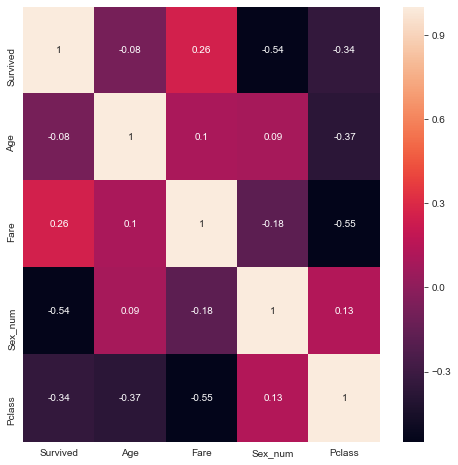

In [219]:
df['Sex_num'] = df['Sex'].map({'female': 0, 'male': 1})
cor_matrix = df[['Survived', 'Age', 'Fare', 'Sex_num', 'Pclass']].corr(method='pearson').round(2)
plt.figure(figsize=(8,8))
sns.heatmap(cor_matrix,annot=True);


## Total Survival Rate

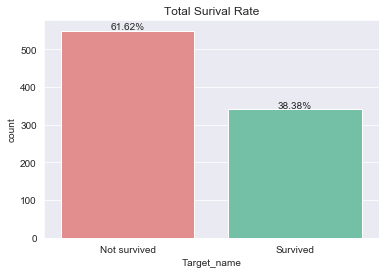

In [188]:
df['Target_name'] = df['Survived'].map({0: 'Not survived', 1: 'Survived'})
ax = sns.countplot(x='Target_name', data=df, palette=survival_palette)
ratio = df[df.Survived==1].shape[0]/df.shape[0]
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/len(df)*100), ha="center") 
ax.set_title("Total Surival Rate");

## Age

Mostly middle aged adults, very few senior citizens.

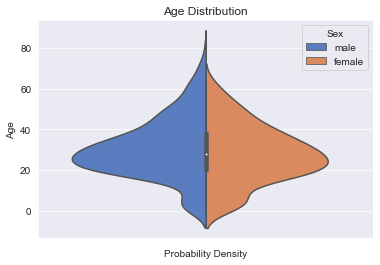

In [153]:
# Common column required for split violin plot to work (not sure if this is a bug?), dropped after use
df['All'] = ""
ax = sns.violinplot(y='Age', x='All', hue='Sex', data=df, split=True);
ax.set_title('Age Distribution');
ax.set_xlabel('Probability Density')
df.drop('All', axis=1, inplace=True)

Median and mean age for those who survivors and non-survivors are both very similar. **Age by *itself* does not seem to be a critical feature.**

Median age of survivors and non-survivors: 28.0, 28.0
Average age of survivors and non-survivors: 28.34, 30.63


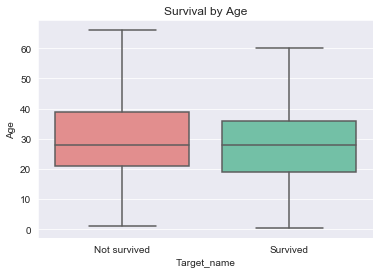

In [222]:
ax = sns.boxplot(y='Age', x='Target_name', data=df, showfliers = False, palette=survival_palette);
ax.set_title('Survival by Age')
print(f"Median age of survivors and non-survivors: {df[df.Survived==1].Age.median()}, {df[df.Survived==0].Age.median()}")
print(f"Average age of survivors and non-survivors: {df[df.Survived==1].Age.mean():.2f}, {df[df.Survived==0].Age.mean():.2f}")

## Gender

Woman showed a much higher survival rate (74.20%) than men (18.89%).

In [69]:
print("74% of females survived versus only 19% of males.")
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

74% of females survived versus only 19% of males.


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
women = df[df.Sex=='female']
men = df[df.Sex=='male']
print(f"The number of females was {women.shape[0]} and number of males was {men.shape[0]}.")

The number of females was 314 and number of males was 577.


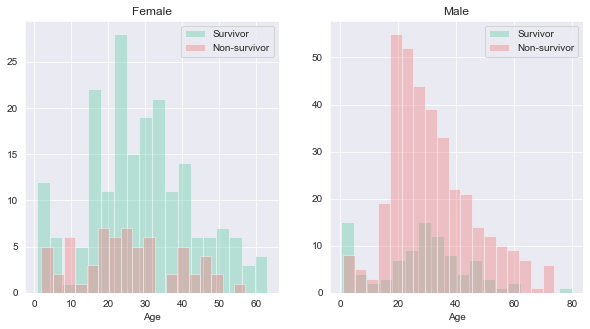

In [175]:
# Middle aged men were more likely to not survive
fig, axes = plt.subplots(1,2,figsize=(10,5))

ax = sns.distplot(women[women.Survived==1].Age.dropna(), kde=False, ax=axes[0], label='Survivor', bins=18, color='mediumaquamarine')
ax = sns.distplot(women[women.Survived==0].Age.dropna(), kde=False, ax=axes[0], label='Non-survivor', bins=18,color='lightcoral')
ax.set_title('Female')
ax.legend()

ax = sns.distplot(men[men.Survived==1].Age.dropna(), kde=False, ax=axes[1], label='Survivor', bins=18, color='mediumaquamarine')
ax = sns.distplot(men[men.Survived==0].Age.dropna(), kde=False, ax=axes[1], label='Non-survivor', bins=18, color='lightcoral')
ax.set_title('Male')
ax.legend();


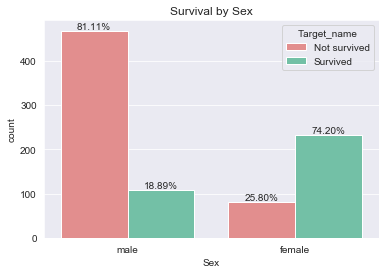

In [174]:
ax = sns.countplot(x='Sex', hue="Target_name", data=df, palette=survival_palette);
total = [len(df[df.Sex==i]) for i in df.Sex.sort_values(ascending=False).unique()] * 2
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/total[i]*100), ha="center") 
ax.set_title("Survival by Sex");

## Pclass

Those in the Pclass 3 (the lowest tier class) showed the lowest survival rate (24.2%).

In [71]:
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


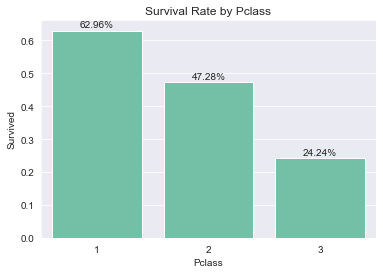

In [200]:
# Plotting above numbers
ax = sns.barplot(x='Pclass', y='Survived', data=df, color='mediumaquamarine', ci=None);
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.01,
            '{:1.2f}%'.format(p.get_height()*100), ha="center") 
ax.set_title('Survival Rate by Pclass');

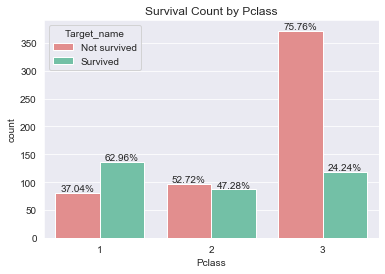

In [210]:
ax = sns.countplot(x='Pclass', hue="Target_name", data=df, palette=survival_palette);
total = [len(df[df.Pclass==i]) for i in df.Pclass.sort_values(ascending=True).unique()] * 2
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/total[i]*100), ha="center") 
ax.set_title("Survival Count by Pclass");

As expected, Pclass 3 had mostly males, and thus aligns with the survivor rate we saw in gender.

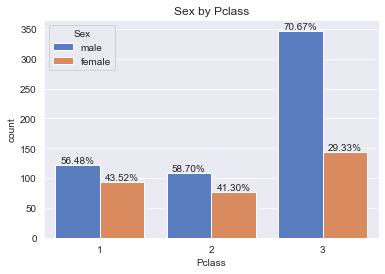

In [213]:

ax = sns.countplot(x='Pclass', hue="Sex", data=df);
total = [len(df[df.Pclass==i]) for i in df.Pclass.sort_values(ascending=True).unique()] * 2
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height() + 3,
            '{:1.2f}%'.format(p.get_height()/total[i]*100), ha="center") 
ax.set_title("Sex by Pclass");

## Fare

We know that Fare and Pclass have some relationship, and it's confirmed by the plot below. As we would expect, those in the highest tier class (Pclass=1), were paying substantially higher fares.

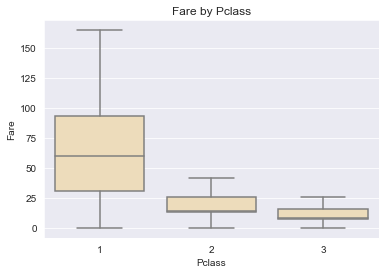

In [230]:
ax = sns.boxplot(y='Fare', x='Pclass', data=df, showfliers=False, color='wheat');
ax.set_title('Fare by Pclass');

Again, those that survived where paying on average higher fares.

Average fare of survivors was 48.40, and non-survivors was 22.12.


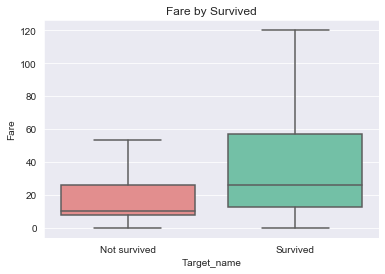

In [271]:
ax = sns.boxplot(y='Fare', x='Target_name', data=df, showfliers=False, palette=survival_palette);
ax.set_title('Fare by Survived');
print(f"Average fare of survivors was {df[df.Survived==1].Fare.mean():.2f}, and non-survivors was {df[df.Survived==0].Fare.mean():.2f}.")

## Embarked

Three possible embarking locations, with a majority embarking from port 'S'. 

Location 'S' also had the highest number of Pclass 3 passengers, and therefore we'd expect the lowest likelihood of survival from that port. 

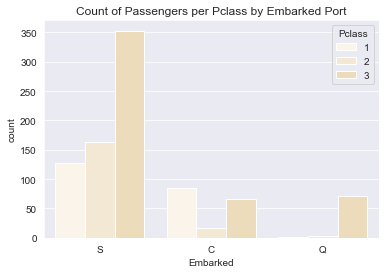

In [302]:
ax = sns.countplot(x='Embarked', hue='Pclass', data=df, color='wheat')
ax.set_title('Count of Passengers per Pclass by Embarked Port');

As expected, passengers who embarked at port 'S' had the lowest likelihood of survival. Port 'C' had the highest survival rate, due to most passengers being in Pclass 1. **Seems to be a correlation mostly between Pclass and Survival rather than Embark with Survival directly**.

**Note**: A line plot may not be the best way to show this because Embarked is not continuous data, other options?

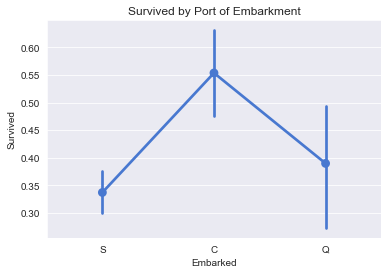

In [312]:
ax = sns.pointplot(x='Embarked', y='Survived', data=df)
ax.set_title("Survived by Port of Embarkment");

## Sibsp and Parch

Number of siblings and parents/children on board can logically be combined together into a single field representing the number of relatives.

Credit to here for the idea: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [327]:
df['Relatives'] = df['SibSp'] + df['Parch']
df[['SibSp', 'Parch', 'Relatives']].head()

,SibSp,Parch,Relatives
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


We notice a substantial dip in likelihood of survival after a number of relatives of 3 (with the exception of 6).

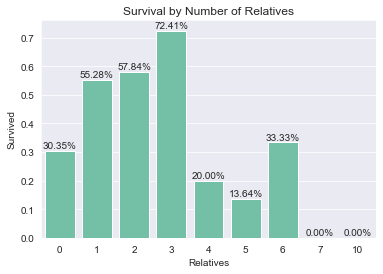

In [331]:
ax = sns.barplot(x='Relatives', y='Survived', data=df, color='mediumaquamarine', ci=None);
for i, p in enumerate(ax.patches):
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.01,
            '{:1.2f}%'.format(p.get_height()*100), ha="center") 
ax.set_title("Survival by Number of Relatives");